## 190531L Rukmal.M.A.D

 ### Q(1)

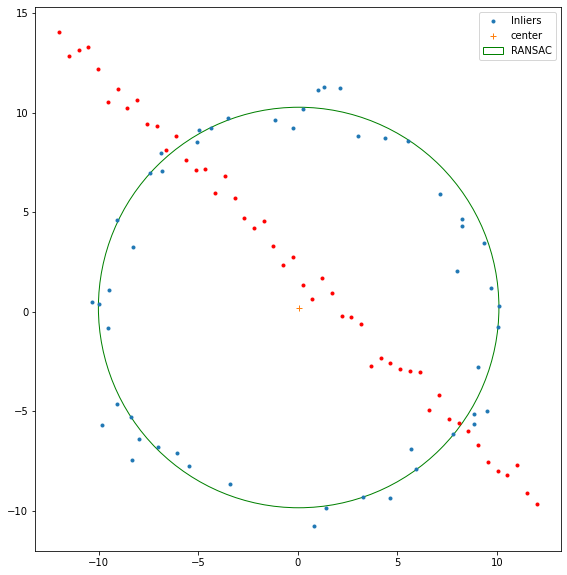

In [1]:
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt

#np.random.seed(0)
N = 100
half_n = N//2
r = 10
s = r/16
t = np.random.uniform (0,2*np.pi,half_n)
n = s*np.random.randn(half_n)
x,y = (r + n)*np.cos( t ),( r + n)*np.sin( t )
X_circ = np.hstack((x.reshape(half_n,1),y.reshape(half_n,1))) #list of cordinates of points 
figure, axes = plt.subplots(figsize=(10,10))
#RANSAC Algorithm
N = 80; #number of repititive fittings
Inlier_ratio=0.9 # Inlier ratio
marginal_dis = 1; #distance from circle that points are considered as inliers
critic_inlier_count = 40
for i in range(0,N,1):
    #choosing 3 random points to uniquely define a circle
    ind_1,ind_2,ind_3 =np.random.randint(50),np.random.randint(50),np.random.randint(50)
    coord_1,coord_2,coord_3 = X_circ[ind_1],X_circ[ind_2],X_circ[ind_3]
    x1,y1,x2,y2,x3,y3=coord_1[0],coord_1[1],coord_2[0],coord_2[1],coord_3[0],coord_3[1]
    #calculating centre and radius of the circle
    c = (x1-x2)**2 + (y1-y2)**2
    a = (x2-x3)**2 + (y2-y3)**2
    b = (x3-x1)**2 + (y3-y1)**2
    s = 2*(a*b + b*c + c*a) - (a*a + b*b + c*c) 
    cent_x = (a*(b+c-a)*x1 + b*(c+a-b)*x2 + c*(a+b-c)*x3) / s
    cent_y = (a*(b+c-a)*y1 + b*(c+a-b)*y2 + c*(a+b-c)*y3) / s 
    ar = a**0.5
    br = b**0.5
    cr = c**0.5 
    radi = ar*br*cr / ((ar+br+cr)*(-ar+br+cr)*(ar-br+cr)*(ar+br-cr))**0.5
    
    inlier_count=0;
    #distance to the points
    for j in range(0,50):
        dis=((X_circ[j][0]-cent_x)**2 +(X_circ[j][1]-cent_y)**2)**0.5
        Is_inlier=abs(dis-radi)<=marginal_dis
        if(Is_inlier):
            inlier_count+=1

    if(critic_inlier_count<=inlier_count):
        axes.plot(x,y,".",label="Inliers")
        axes.plot(cent_x,cent_y,'+',label='center')
        draw_circle = plt.Circle((cent_x,cent_y), radi,fill=False,color='g',label='RANSAC')
        axes.set_aspect(1)
        axes.add_artist(draw_circle)
        plt.legend()
        break
         
#plotting rest of points
m,b = -1,2
s=r/16
x_line = np.linspace(-12,12,half_n)
y_line = m*x_line+b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n,1), y.reshape(half_n,1)))
X = np.vstack((X_circ,X_line))
plt.plot(x_line,y_line,".",color='r')
plt.show()



### Q(2)

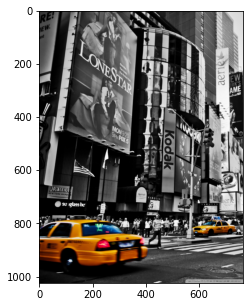

In [2]:

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

im1 = cv.imread(r'back_image.jpg',cv.IMREAD_COLOR)
assert im1 is not None
im2 = cv.imread(r'front_image1.jpg',cv.IMREAD_COLOR)
assert im2 is not None
img1_plt = cv.cvtColor(im1,cv.COLOR_BGR2RGB)
fig,ax = plt.subplots(figsize=(12,5))
ax.imshow(img1_plt)
plt.show()

In [3]:
# fuction use to identify points using mouse clicks
import cv2 as cv

def click_event(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        print(x, ' ', y)
        cv.imshow('image', img)

img = cv.imread(r'back_image.jpg', 1)
cv.imshow('image', img)
cv.setMouseCallback('image', click_event)
cv.waitKey(0)
cv.destroyAllWindows()


90   445
341   540
369   95
200   2


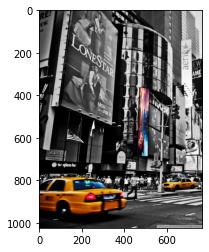

In [4]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

backimg = cv.imread(r'back_image.jpg')
frontimg = cv.imread(r'front_image1.jpg')
assert backimg is not None
assert frontimg is not None


#four corners of the back image to be replaced-------------------------------------------------
pts_backimg = np.array([[474,363], [516,371], [508,685], [462,685]])

#four corners of our front image
pts_frontimg = np.array([[0, 0], [frontimg.shape[1] - 1, 0], [frontimg.shape[1] - 1, frontimg.shape[0] - 1], [0, frontimg.shape[0] - 1]])

#Calculate homography matrix
homographyMatrix, status = cv.findHomography(pts_frontimg, pts_backimg)

#warp frontimg to backimg
result1 = cv.warpPerspective(frontimg, homographyMatrix, (backimg.shape[1], backimg.shape[0]))

#removing the rest of area in back image
cv.fillConvexPoly(backimg, pts_backimg, 0, 16)

#Add warped image to the backimage
result = backimg + result1

#display image
result = cv.cvtColor(result, cv.COLOR_BGR2RGB)
plt.imshow(result)
plt.show()

### Q(3)

a)

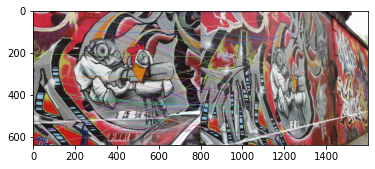

In [92]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img1 = cv.imread(r'img1.ppm') 
img2 = cv.imread(r'img5.ppm')
assert img1 is not None
assert img2 is not None

img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
sift = cv.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)
bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)
matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)
img3 = cv.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img3)
plt.figure(figsize=(20,10))
plt.show()


b)

In [103]:
import cv2 as cv
import numpy as np

MIN_MATCH_COUNT = 10 #minimum matching points required
#opening two images
img1 = cv.imread(r'img1.ppm') 
img2 = cv.imread(r'img5.ppm')
assert img1 is not None
assert img2 is not None
#calculating keypoints and descriptors
orb = cv.ORB_create()
keypoint1, descriptor1 = orb.detectAndCompute(img1, None)
keypoint2, descriptor2 = orb.detectAndCompute(img2, None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv.FlannBasedMatcher(index_params, search_params)

descriptor1 = np.float32(descriptor1)
descriptor2 = np.float32(descriptor2)

matches = flann.knnMatch(descriptor1, descriptor2, k=2)

goodMatches = []

for m, n in matches:
    if m.distance < 0.7 * n.distance:
        goodMatches.append(m)

src_pts = 0
dst_pts = 0
if len(goodMatches) > MIN_MATCH_COUNT:
    dst_pts = np.float32([kp1[m.queryIdx].pt for m in goodMatches]).reshape(-1, 2)
    src_pts = np.float32([kp2[m.trainIdx].pt for m in goodMatches]).reshape(-1, 2)
    
def generateRandom(src_Pts, dest_Pts, N):
    r = np.random.choice(src_Pts, N)
    src = [src_Pts[i] for i in r]
    dest = [dest_Pts[i] for i in r]
    return np.asarray(src, dtype=np.float32), np.asarray(dest, dtype=np.float32)


def findH(src, dest, N):
    A = []
    for i in range(N):
        x, y = src[i][0], src[i][1]
        xp, yp = dest[i][0], dest[i][1]
        A.append([x, y, 1, 0, 0, 0, -x * xp, -xp * y, -xp])
        A.append([0, 0, 0, x, y, 1, -yp * x, -yp * y, -yp])
    A = np.asarray(A)
    U, S, Vh = np.linalg.svd(A)
    L = Vh[-1, :] / Vh[-1, -1]
    H = L.reshape(3, 3)
    return H

def ransacHomography(src_Pts, dst_Pts):
    maxI = 0
    maxLSrc = []
    maxLDest = []
    for i in range(70):
        srcP, destP = generateRandom(src_Pts, dst_Pts, 4)
        H = findH(srcP, destP, 4)
        inlines = 0
        linesSrc = []
        lineDest = []
        for p1, p2 in zip(src_Pts, dst_Pts):
            p1U = (np.append(p1, 1)).reshape(3, 1)
            p2e = H.dot(p1U)
            p2e = (p2e / p2e[2])[:2].reshape(1, 2)[0]
            if cv2.norm(p2 - p2e) < 10:
                inlines += 1
                linesSrc.append(p1)
                lineDest.append(p2)
        if inlines > maxI:
            maxI = inlines
            maxLSrc = linesSrc.copy()
            maxLSrc = np.asarray(maxLSrc, dtype=np.float32)
            maxLDest = lineDest.copy()
            maxLDest = np.asarray(maxLDest, dtype=np.float32)
    Hf = findH(maxLSrc, maxLDest, maxI)
    return Hf


H = ransacHomography(src_pts, dst_pts)
print("Calculated Homograpy")
H
print("Given Homography")
H_given = np.array([[6.2544644e-01,5.7759174e-02,2.2201217e+02],[
   2.2240536e-01,1.1652147e+00,-2.5605611e+01],[
   4.9212545e-04,-3.6542424e-05,1.0000000e+00]])
H_given

ValueError: a must be greater than 0 unless no samples are taken

c)

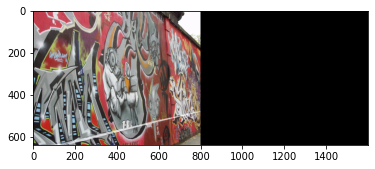

In [104]:
H = np.array([[6.2544644e-01,5.7759174e-02,2.2201217e+02],[
   2.2240536e-01,1.1652147e+00,-2.5605611e+01],[
   4.9212545e-04,-3.6542424e-05,1.0000000e+00]])

dst = cv.warpPerspective(img1,H,((img1.shape[1] + img2.shape[1]), img2.shape[0])) #wraped image
dst[0:img2.shape[0], 0:img2.shape[1]] = img2 #stitched image
cv.imwrite('output.jpg',dst)
dst = cv.cvtColor(dst, cv.COLOR_BGR2RGB)
plt.imshow(dst)
plt.show()